In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
reddit_df = pd.read_csv('/home/jeremy/Teaching/intro_to_programming_and_ds/resources/data/100k_random_reddit_2018.csv')
reddit_df.created_utc = pd.to_datetime(reddit_df.created_utc, unit='s')
reddit_df = reddit_df.set_index('created_utc')

### Exercise 1

Sort the data frame by score and select the rows with the 10th to 20th highest scores.


In [64]:
df_by_score = reddit_df.sort_values('score', ascending=False)
len(df_by_score.iloc[9:20])

11

### Exercise 2

Now, how would you select just the `subreddit` and `comment_length` columns for the rows you selected above?

In [67]:
df_by_score.iloc[9:20,[1,3]]
df_by_score.iloc[9:20].loc[:,['subreddit', 'comment_length']]

,subreddit,comment_length
63126,madlads,80
73188,AskReddit,127
79165,gaming,137
1963,StarWars,162
23011,AskReddit,189
64345,therewasanattempt,120
88861,fo76,42
8514,videos,84
77395,videos,70
96618,TwoXChromosomes,303


### Exercise 3

Find the average (mean) comment length for each subreddit and sort by comment length

### Exercise 4

Plot the number of comments and average score. Are frequent posters more likely to share comments that are well-received?

*Hint*: You will want to use a dataframe that groups the data by person

In [23]:
grouped_df = reddit_df.groupby('author')

subreddit_count = grouped_df.subreddit.nunique()
comments_count = grouped_df.size()
score_mean = grouped_df.score.mean()


person_df = pd.DataFrame({'subreddit_count': subreddit_count,
                          'comments_count': comments_count,
                          'mean_score': score_mean})

### Exercise 5

Plot the number of comments per month over the year.

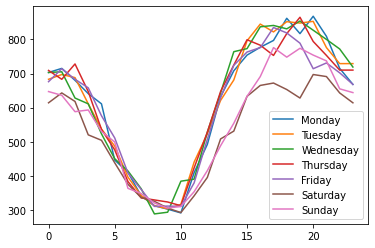

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

reddit_df = pd.read_csv('/home/jeremy/Teaching/intro_to_programming_and_ds/resources/data/100k_random_reddit_2018.csv')

reddit_df["created_utc"] = pd.to_datetime(reddit_df["created_utc"], unit='s')

reddit_df['day_of_week'] = reddit_df['created_utc'].dt.dayofweek

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for day in days:
    day_df = reddit_df[reddit_df['day_of_week'] == days.index(day)]
    plt.plot(day_df.groupby(day_df["created_utc"].dt.hour).size(), label=day)

plt.legend()
plt.show()

### Exercise 6

See if you can figure out how to change the above plot so that instead of showing one overall line for comments per hour, it shows a line for each day of the week (e.g., a line for comments per hour on Mondays, another for Tuesdays, etc.).

This code can help you to get started: it sums the number of comments by hour and day.

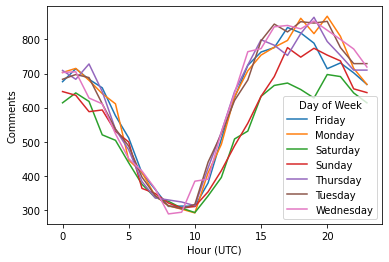

In [74]:
reddit_df.groupby([reddit_df.index.hour, reddit_df.index.day_name()]).size().unstack().plot(xlabel='Hour (UTC)', ylabel='Comments')
plt.legend(title='Day of Week');

In [44]:
reddit_df.groupby(reddit_df.index.weekday).mean()

,created_utc,comment_length,score
created_utc,,,
0,1.531197e+09,166.903591,8.189228
1,1.531021e+09,166.886344,10.458118
2,1.531093e+09,164.661981,9.479451
3,1.531080e+09,166.660076,7.200027
4,1.531340e+09,161.482581,8.526077
5,1.531539e+09,152.759592,8.298236
6,1.531933e+09,154.687898,8.934586
